#Libraries and Dates

In [ ]:
#Install Libraries
!pip install yfinance
!pip install tfcausalimpact

In [4]:
#Import libraries
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#Define Dates
training_start="2020-09-01"
training_end=("2020-10-19")
treatment_start="2020-10-20"
treatment_end="2020-10-23"
end_stock=("2020-10-24")

Loading Financial Data

In [11]:
#Bitcoin data
y = ["BTC-USD"]
y=yf.download(tickers=y,
              start=training_start,
              end=end_stock,
              interval="1d")
y=y['Adj Close'].rename("y")
y[:1]

[*********************100%%**********************]  1 of 1 completed


Date
2020-09-01    11970.478516
Name: y, dtype: float64

#Load control groups

In [15]:
#Load more stock data
stocks=["CARL-B.CO","ZAL.DE", "SQ", "JD", "CRSP", "TRMB", "DE", "KTOS", "GOOG"]
X=yf.download(tickers=stocks,
              start=training_start,
              end=end_stock,
              interval="1d")
X.head()

[*********************100%%**********************]  9 of 9 completed


Adj Close                                               \
             CARL-B.CO       CRSP          DE       GOOG         JD   
Date                                                                  
2020-09-01  794.451172  93.419998  210.029678  83.035500  79.267685   
2020-09-02  802.765198  93.930000  209.470062  86.414001  79.959564   
2020-09-03  818.099915  85.690002  203.391754  82.092003  75.952454   
2020-09-04  804.612671  82.019997  203.903107  79.552002  76.874954   
2020-09-07  812.926697        NaN         NaN        NaN        NaN   

                                                              Close  ...  \
                 KTOS          SQ       TRMB     ZAL.DE   CARL-B.CO  ...   
Date                                                                 ...   
2020-09-01  19.700001  166.660004  53.410000  77.000000  860.000000  ...   
2020-09-02  19.910000  162.880005  54.310001  77.000000  869.000000  ...   
2020-09-03  19.520000  152.860001  50.900002  75.080002  885.599976  ...   
2020-09-04  19.260000  146.389999  49.959999  71.739998  871.000000  ...   
2020-09-07        NaN         NaN        NaN  74.000000  880.000000  ...   

                 Open    Volume                                                \
               ZAL.DE CARL-B.CO       CRSP         DE        GOOG          JD   
Date                                                                            
2020-09-01  74.959999    269532   779500.0  1873400.0  36506000.0  11431400.0   
2020-09-02  77.500000    202539   532000.0  1983000.0  50224000.0  13860900.0   
2020-09-03  77.260002    248867  1278900.0  1975200.0  62156000.0  19254000.0   
2020-09-04  74.800003    221091  1570300.0  1662300.0  52172000.0  21500900.0   
2020-09-07  72.239998     90498        NaN        NaN         NaN         NaN   

                                                      
                 KTOS          SQ       TRMB  ZAL.DE  
Date                                                  
2020-09-01   587600.0  12306400.0   542300.0  790198  
2020-09-02   612800.0  11214800.0   728800.0  496554  
2020-09-03   847100.0  16421200.0  1220300.0  736259  
2020-09-04  1060000.0  17995200.0   914700.0  662250  
2020-09-07        NaN         NaN        NaN  362062  

[5 rows x 54 columns]

In [16]:
#Getting just the adjusted close
X=X.iloc[:,:len(stocks)]
X.head(1)

Adj Close                                                        \
             CARL-B.CO       CRSP          DE     GOOG         JD       KTOS   
Date                                                                           
2020-09-01  794.451172  93.419998  210.029678  83.0355  79.267685  19.700001   

                                      
                    SQ   TRMB ZAL.DE  
Date                                  
2020-09-01  166.660004  53.41   77.0

In [17]:
#REmoving uneeded level
X.columns=X.columns.droplevel()
X.head(1)

,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-01,794.451172,93.419998,210.029678,83.0355,79.267685,19.700001,166.660004,53.41,77.0


In [19]:
#Combine everything
df=pd.concat([y,X],axis=1).dropna()
df.head()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-09-01,11970.478516,794.451172,93.419998,210.029678,83.035500,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,11414.034180,802.765198,93.930000,209.470062,86.414001,79.959564,19.910000,162.880005,54.310001,77.000000
2020-09-03,10245.296875,818.099915,85.690002,203.391754,82.092003,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,10511.813477,804.612671,82.019997,203.903107,79.552002,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-08,10131.516602,799.439575,81.459999,202.841827,76.619499,73.242615,19.230000,139.110001,49.139999,73.440002


#Data Analysis

In [20]:
#Prepare dataframe with only training data
df_training=df[df.index<=training_end]
df_training.tail()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-10-13,11425.899414,827.891968,103.059998,229.658981,78.584000,79.382996,20.959999,190.470001,51.720001,85.820000
2020-10-14,11429.506836,822.718811,101.370003,230.869125,78.403999,77.931984,21.010000,187.490005,50.540001,84.980003
2020-10-15,11495.349609,808.492615,99.889999,230.646484,77.956497,77.115181,21.100000,188.600006,52.290001,84.419998
2020-10-16,11322.123047,801.656555,109.830002,232.408463,78.650497,78.335571,20.790001,186.350006,52.340000,84.800003
2020-10-19,11742.037109,804.427917,107.720001,230.578705,76.730499,77.461121,20.639999,186.960007,51.970001,85.000000


#Stationarity

In [27]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
test=adfuller(x=df_training.y)[1]
print(test)
if test<0.05:
  print("The time series is stationary")
else:
  print("The time series is not stationary")

0.0987470320882271
The time series is not stationary


In [31]:
#Differencing
differencing=df_training.pct_change().dropna()

#Stationarity
test=adfuller(x=differencing.y)[1]
print(test)
if test<0.05:
  print("The time series is stationary")
else:
  print("The time series is not stationary")

3.8054323617260893e-07
The time series is stationary


#Correlation

<Axes: >

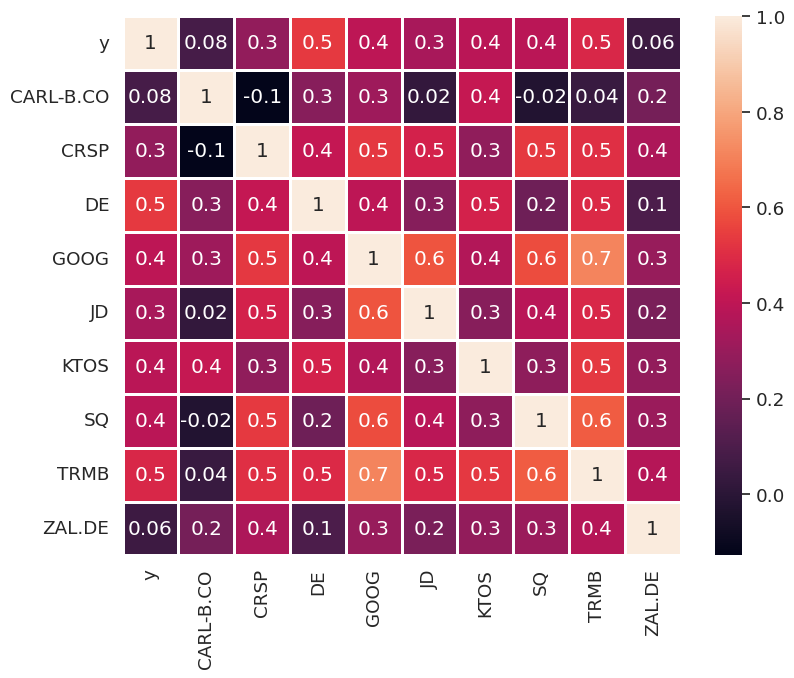

In [35]:
#Correlation Matrix
plt.figure(figsize=(9,7))
sns.set(font_scale=1.2)
sns.heatmap(differencing.corr(),
            annot=True,
            fmt='.1g',
            linewidth=1,
            linecolor='white')

#Google causal impact

In [37]:
#Prepare the dataset
df_final=df.drop(columns=["CARL-B.CO","ZAL.DE"])
df_final.head(1)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,210.029678,83.0355,79.267685,19.700001,166.660004,53.41


In [39]:
#prepare pre and post period
pre_period=[training_start,training_end]
post_period=[treatment_start,treatment_end]

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


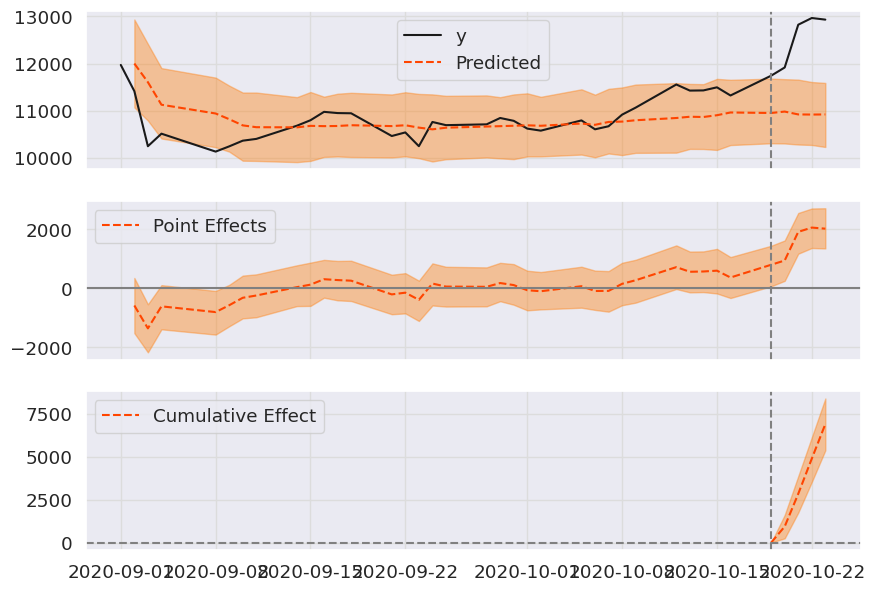

In [40]:
#Google causal impact
impact=CausalImpact(data=df_final,pre_period=pre_period,post_period=post_period)
impact.plot()

In [44]:
#Summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12659.36           50637.45
Prediction (s.d.)         10934.65 (201.17)  43738.59 (804.7)
95% CI                    [10572.94, 11361.53][42291.76, 45446.11]

Absolute effect (s.d.)    1724.72 (201.17)   6898.86 (804.7)
95% CI                    [1297.84, 2086.42] [5191.34, 8345.7]

Relative effect (s.d.)    15.77% (1.84%)     15.77% (1.84%)
95% CI                    [11.87%, 19.08%]   [11.87%, 19.08%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [45]:
#Summary Report
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12659.36. By contrast, in the absence of an
intervention, we would have expected an average response of 10934.65.
The 95% interval of this counterfactual prediction is [10572.94, 11361.53].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1724.72 with a 95% interval of
[1297.84, 2086.42]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 50637.45.
By contrast, had the intervention not taken place, we would have expected
a sum of 43738.59. The 95% interval of this prediction is [42291.76, 45446.11].


The above results are given in terms of absolute numbers. In relative
